## <div style="text-align:center"><u>Model to Authenticate Bank Notes</u></div>
            The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 1,372 observations with 4 input variables and 1 output variable.

#### <u>Following the below Framework to Implement the model

<img src="step-wise-ml-framework.png">

#### 1. Promlem Definition

This is binary classification problem, based on the given details need to find the bank note is authentic or not

In [4]:
#importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats

#### 2. Data

Based on the Data collection strategy need to load the data for processing

In [5]:
#loading the data set from the text file
inp_df=pd.read_csv('data_banknote_authentication.txt',names=['Variance of Wavelet Transformed image',
                                                              'Skewness of Wavelet Transformed image',
                                                              'Kurtosis of Wavelet Transformed image',
                                                              'Entropy of image',
                                                              'Class'])

In [6]:
inp_df.head(5)

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Kurtosis of Wavelet Transformed image,Entropy of image,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
#checking any null values in the given data set
inp_df.isnull().sum()

Variance of Wavelet Transformed image    0
Skewness of Wavelet Transformed image    0
Kurtosis of Wavelet Transformed image    0
Entropy of image                         0
Class                                    0
dtype: int64

In [8]:
#check the class lable values counts to verify data set is balanced/Imbalanced
inp_df.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

#### 3. Evaluation Matrics

Need to get the customer requiremnet for the minimum Evaluation Matrics to accept this model, Just for practice purpose we will consider bench mark is 95% accuracy

#### 4. Feture Engineering(EDA)

In [9]:
#Need to check the disributions of the features
#If required apply feature transformations
#Need to verify the outliers
#Need to handle the outliers
#Need to verify the correlation of featurs w.r.t lable
#If required need ot drop the multi correlated features w.r.t lable
#Need to standardize the features


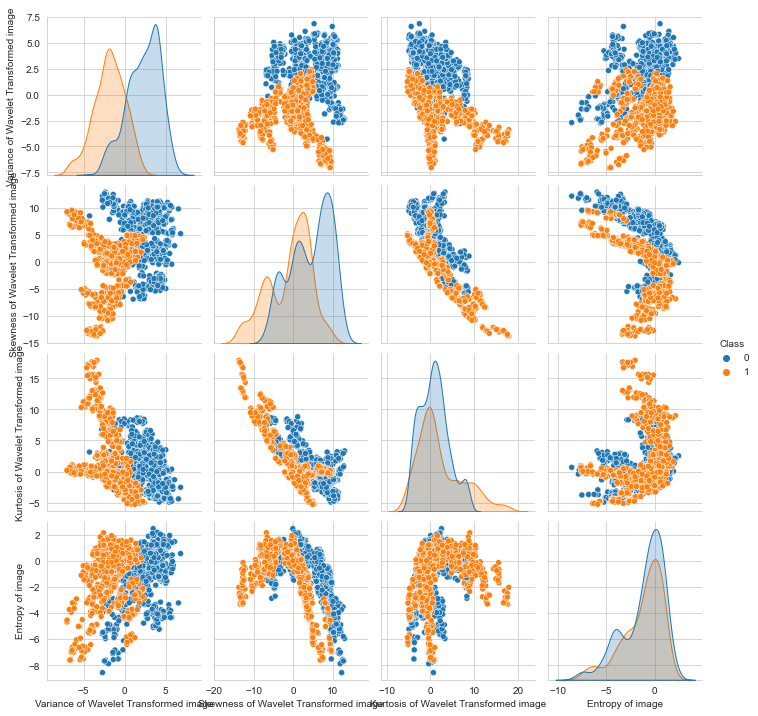

In [10]:
#creating pair plots
sns.set_style("whitegrid")
sns.pairplot(inp_df,hue="Class")
plt.show()

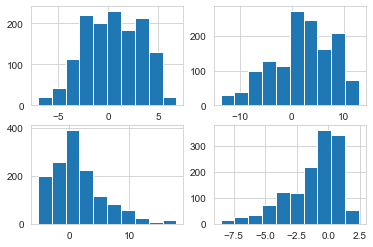

In [11]:
#ploting histogram to check the distributions
fig,axs=plt.subplots(2,2)
axs[0,0].hist(inp_df['Variance of Wavelet Transformed image'])
axs[0,1].hist(inp_df['Skewness of Wavelet Transformed image'])
axs[1,0].hist(inp_df['Kurtosis of Wavelet Transformed image'])
axs[1,1].hist(inp_df['Entropy of image'])
plt.show()

In [12]:
#feature tranformation for the skeweness data
kurtosis_data1=inp_df.iloc[:,2:3]
Entrophy_data=inp_df.iloc[:,3:4]

In [13]:
#Checking if any -ve values existis
Entrophy_data.iloc[:,0]

0      -0.44699
1      -1.46210
2       0.10645
3      -3.59440
4      -0.98880
         ...   
1367   -0.55949
1368    0.34179
1369   -2.77710
1370   -1.28230
1371    1.19520
Name: Entropy of image, Length: 1372, dtype: float64

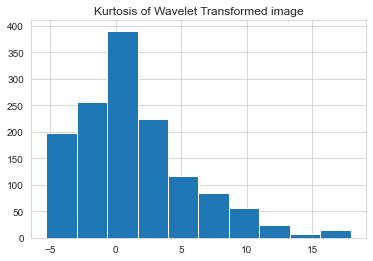

<ipython-input-16-f258f9e8d422>:4: RuntimeWarning: invalid value encountered in log
  log_kurtosis=np.log(kurtosis_data)
<ipython-input-16-f258f9e8d422>:5: RuntimeWarning: invalid value encountered in sqrt
  sqrt_kurtosis=np.sqrt(kurtosis_data)


In [16]:
kurtosis_data=inp_df.iloc[:,2:3]
kurtosis_data.hist()
plt.show()
log_kurtosis=np.log(kurtosis_data)
sqrt_kurtosis=np.sqrt(kurtosis_data)
#boxcox transformation can't be done for -ve values
#boxcox_kurtosis=stats.boxcox(kurtosis_data.iloc[:,0])

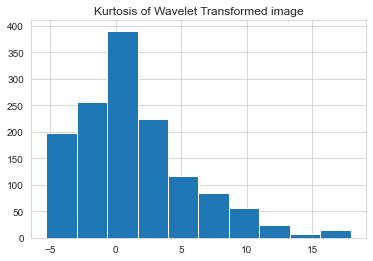

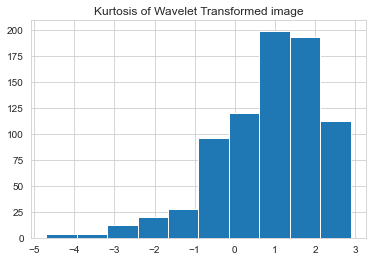

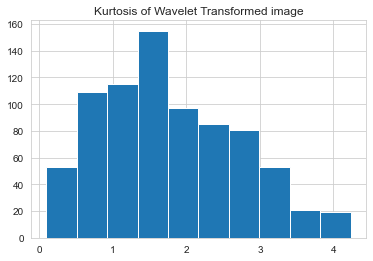

In [17]:
kurtosis_data.hist(),log_kurtosis.hist(), sqrt_kurtosis.hist()
plt.show()

In [18]:
entropy_data=inp_df['Entropy of image']

D:\AI\Practice\ML_Models\env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


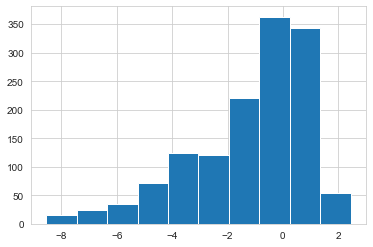

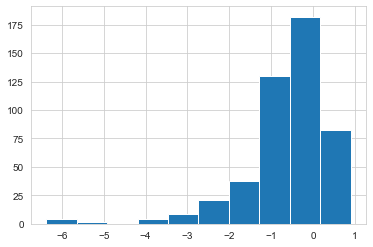

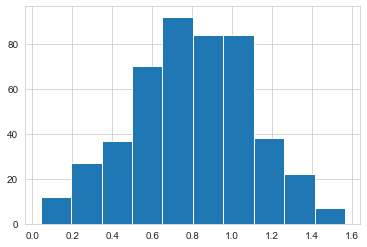

In [19]:
log_entropy_data=np.log(entropy_data)
sqrt_entropy_data=np.sqrt(entropy_data)
entropy_data.hist()
plt.show()
log_entropy_data.hist()
plt.show()
sqrt_entropy_data.hist()
plt.show()

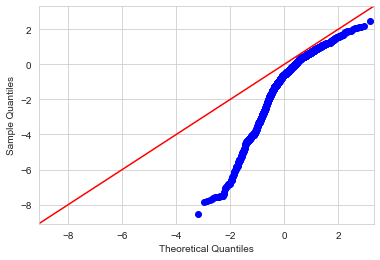

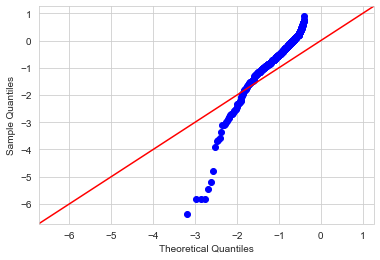

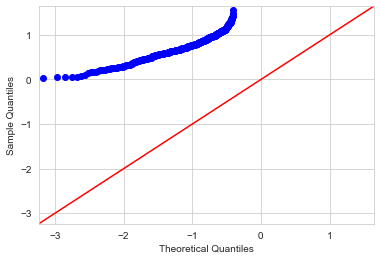

In [20]:
sm.qqplot(entropy_data,line='45')
sm.qqplot(log_entropy_data,line='45')
sm.qqplot(sqrt_entropy_data,line='45')
plt.show()

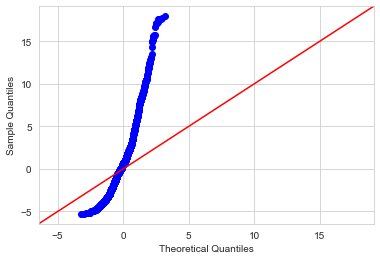

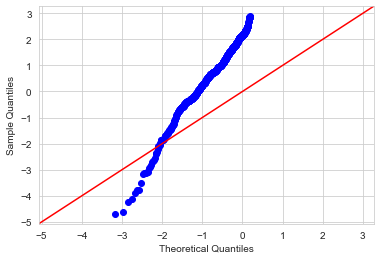

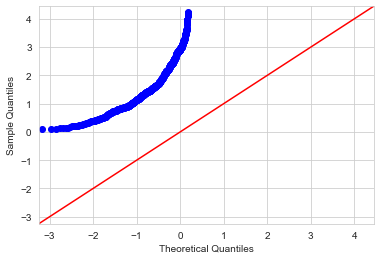

In [21]:
sm.qqplot(kurtosis_data.iloc[:,0],line='45')
sm.qqplot(log_kurtosis.iloc[:,0],line='45')
sm.qqplot(sqrt_kurtosis.iloc[:,0],line='45')
plt.show()

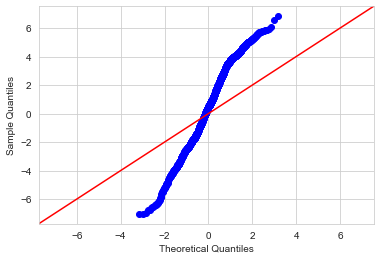

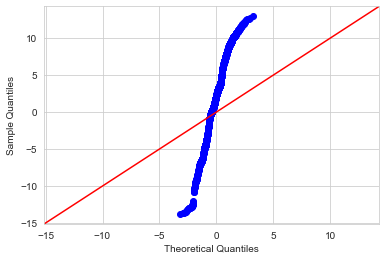

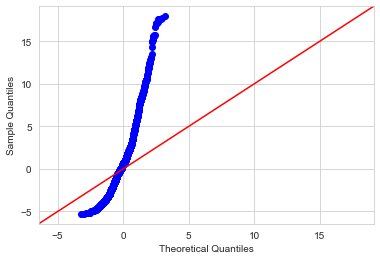

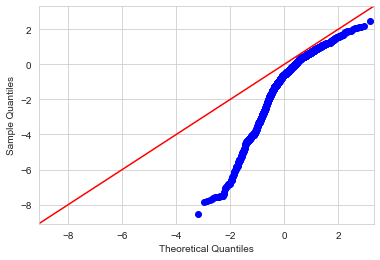

In [22]:
#ploting QQ plot to see the distribution
sm.qqplot(inp_df['Variance of Wavelet Transformed image'],line='45')
sm.qqplot(inp_df['Skewness of Wavelet Transformed image'],line='45')
sm.qqplot(inp_df['Kurtosis of Wavelet Transformed image'],line='45')
sm.qqplot(inp_df['Entropy of image'],line='45')
plt.show()

5. Modeling

In [23]:
x_dummy=inp_df.iloc[:,:-1]
y_dummy=inp_df.iloc[:,-1:]

In [24]:
x_dummy.head(3)

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Kurtosis of Wavelet Transformed image,Entropy of image
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [26]:
dx_train,dx_test,dy_train,dy_test=train_test_split(x_dummy,y_dummy,test_size=0.2,random_state=42)

In [27]:
dknn_mdl=KNeighborsClassifier()

In [28]:
dknn_mdl.fit(dx_train,dy_train)

<ipython-input-28-141ebe034d03>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  dknn_mdl.fit(dx_train,dy_train)


KNeighborsClassifier()

In [29]:
dy_pred=dknn_mdl.predict(dx_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
print(accuracy_score(dy_test,dy_pred))
print(confusion_matrix(dy_test,dy_pred))
print(classification_report(dy_test,dy_pred))

1.0
[[148   0]
 [  0 127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
dlr_mdl=LogisticRegression(multi_class='multinomial')

In [34]:
dlr_mdl.fit(dx_train,dy_train)

D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(multi_class='multinomial')

In [35]:
ylr_pred=dlr_mdl.predict(dx_test)

In [36]:
ylr_pred_prod=dlr_mdl.predict_proba(dx_test)

In [37]:
ylr_pred_prod[1]

array([0.98094945, 0.01905055])

In [38]:
accuracy_score(ylr_pred,dy_test)

0.9854545454545455

In [39]:
confusion_matrix(dy_test,ylr_pred)

array([[146,   2],
       [  2, 125]], dtype=int64)

In [40]:
print(classification_report(dy_test,ylr_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [41]:
#Need to avoid the overfit
#1. Using Crossvalidation
#2. Training with more data
#3. Remove few existing features
#4. Early Stopping
#5. Regularization
#6. Ensambel Technique


In [42]:
#1. Using Crossvalidation
from sklearn.model_selection import cross_val_score,cross_validate

In [43]:
cvmdl=cross_val_score(dlr_mdl,dx_train,dy_train,cv=5)

D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [44]:
type(dy_train)

pandas.core.frame.DataFrame

In [45]:
cvmdl

array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 0.99086758])

In [48]:
cvmdl.mean()

0.989057700290577

In [49]:
accuracy_score(dy_test,dlr_mdl.predict(dx_test))

0.9854545454545455

In [50]:
#2. Training with more data
""" we can get more data from business, to train data"""

' we can get more data from business, to train data'

In [51]:
#3. Removing exisitng features
for i in range(1,5):
    tm_lrmdl=LogisticRegression()   
    tmcross_score=cross_val_score(tm_lrmdl,dx_train.iloc[:,:i],dy_train,cv=10)
    #print("accuracies with ",i," features are",tmcross_score)
    print("accuracies Mean for the ",i," Features are ",tmcross_score.mean())

D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

accuracies Mean for the  1  Features are  0.855070892410342


D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

accuracies Mean for the  2  Features are  0.8905921601334444


D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

accuracies Mean for the  3  Features are  0.9917764804003337
accuracies Mean for the  4  Features are  0.9917764804003337


D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [52]:
#4 Early Stopping
""" Need to see the validation and Test set error graphs and verify if any early stopping will get benifits from overfitting"""

' Need to see the validation and Test set error graphs and verify if any early stopping will get benifits from overfitting'

In [53]:
#5 Regularization
""" Need to add the regulizer based on the model"""

' Need to add the regulizer based on the model'

In [54]:
#6 Ensamble Technique
""" Using ensamble technique is one of the way to handle the overfitting, it uses multiple weak learners"""

' Using ensamble technique is one of the way to handle the overfitting, it uses multiple weak learners'

6. Experiments

In [55]:
from sklearn.naive_bayes import MultinomialNB


In [56]:
#can't apply MultinomialNB beacuse of -ve values in the features
MNB_clf=MultinomialNB()

In [57]:
#Try with Liner SVM
from sklearn.svm import LinearSVC
lsvm=LinearSVC()

In [58]:
lsvm.fit(dx_train,dy_train)

D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [59]:
dy_pred_lsvm=lsvm.predict(dx_test)

In [60]:
accuracy_score(dy_pred_lsvm,dy_test)

0.9854545454545455

In [61]:
confusion_matrix(dy_pred_lsvm,dy_test)

array([[146,   2],
       [  2, 125]], dtype=int64)

In [62]:
lsvm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [63]:
#using Decision Trees
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtc_clf=DecisionTreeClassifier()

In [65]:
dtc_clf.fit(dx_test,dy_test)

DecisionTreeClassifier()

In [66]:
dy_pred_dtc=dtc_clf.predict(dx_test)

In [67]:
accuracy_score(dy_pred_dtc,dy_test)

1.0

In [68]:
confusion_matrix(dy_pred,dy_pred_dtc)

array([[148,   0],
       [  0, 127]], dtype=int64)

In [69]:
#using Ensamble techniques
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_clf=RandomForestClassifier()

In [71]:
rf_clf.fit(dx_train,dy_train)

<ipython-input-71-4ffcd79455c9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(dx_train,dy_train)


RandomForestClassifier()

In [72]:
dy_pred_rf=rf_clf.predict(dx_test)

In [73]:
accuracy_score(dy_test,dy_pred_rf)

0.9927272727272727

In [74]:
confusion_matrix(dy_test,dy_pred_rf)

array([[148,   0],
       [  2, 125]], dtype=int64)

In [75]:
#Trying Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gbc_mdl=GradientBoostingClassifier()

In [77]:
gbc_mdl.fit(dx_train,dy_train)

D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [78]:
dy_pred_gbc=gbc_mdl.predict(dx_test)

In [79]:
accuracy_score(dy_pred_gbc,dy_test)

1.0

In [80]:
confusion_matrix(dy_pred_gbc,dy_test)

array([[148,   0],
       [  0, 127]], dtype=int64)

In [81]:
!pip install xgboost

In [82]:
#Applying XGB Classifier
import xgboost as xgb

In [83]:
xgb_mdl=xgb.XGBClassifier()

In [84]:
xgb_mdl.fit(dx_train,dy_train)

[14:24:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\AI\Practice\ML_Models\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
dy_pred_xgb=xgb_mdl.predict(dx_test)

In [86]:
accuracy_score(dy_pred_xgb,dy_pred)

0.9963636363636363

In [87]:
confusion_matrix(dy_pred_xgb,dy_pred)

array([[148,   1],
       [  0, 126]], dtype=int64)

In [88]:
#Applying Grid search to know the best model 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [89]:
cls_modles=[dknn_mdl,dlr_mdl,lsvm,dtc_clf,rf_clf,gbc_mdl,xgb_mdl]

In [90]:
mdls_scrs={}
mdls_means={}
for i in cls_modles:    
    cvs=cross_val_score(i,dx_train,dy_train,cv=5)
    mdls_scrs[i]=cvs
    mdls_means[i]=cvs.mean()
    #print("Scores using model ",i," are",cvs)
    #print("Mean score using model ",i," are",cvs.mean())
    print(mdls_scrs)
    print(mdls_means)

D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A

{KNeighborsClassifier(): array([1., 1., 1., 1., 1.])}
{KNeighborsClassifier(): 1.0}
{KNeighborsClassifier(): array([1., 1., 1., 1., 1.]), LogisticRegression(multi_class='multinomial'): array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 0.99086758])}
{KNeighborsClassifier(): 1.0, LogisticRegression(multi_class='multinomial'): 0.989057700290577}


D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\AI\Practice\M

{KNeighborsClassifier(): array([1., 1., 1., 1., 1.]), LogisticRegression(multi_class='multinomial'): array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 0.99086758]), LinearSVC(): array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 1.        ])}
{KNeighborsClassifier(): 1.0, LogisticRegression(multi_class='multinomial'): 0.989057700290577, LinearSVC(): 0.9908841843088417}
{KNeighborsClassifier(): array([1., 1., 1., 1., 1.]), LogisticRegression(multi_class='multinomial'): array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 0.99086758]), LinearSVC(): array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 1.        ]), DecisionTreeClassifier(): array([0.98636364, 0.97727273, 0.97260274, 0.99086758, 0.99086758])}
{KNeighborsClassifier(): 1.0, LogisticRegression(multi_class='multinomial'): 0.989057700290577, LinearSVC(): 0.9908841843088417, DecisionTreeClassifier(): 0.9835948526359486}


D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A co

{KNeighborsClassifier(): array([1., 1., 1., 1., 1.]), LogisticRegression(multi_class='multinomial'): array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 0.99086758]), LinearSVC(): array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 1.        ]), DecisionTreeClassifier(): array([0.98636364, 0.97727273, 0.97260274, 0.99086758, 0.99086758]), RandomForestClassifier(): array([0.99090909, 0.97727273, 0.99086758, 1.        , 0.99086758])}
{KNeighborsClassifier(): 1.0, LogisticRegression(multi_class='multinomial'): 0.989057700290577, LinearSVC(): 0.9908841843088417, DecisionTreeClassifier(): 0.9835948526359486, RandomForestClassifier(): 0.989983395599834}


D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

{KNeighborsClassifier(): array([1., 1., 1., 1., 1.]), LogisticRegression(multi_class='multinomial'): array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 0.99086758]), LinearSVC(): array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 1.        ]), DecisionTreeClassifier(): array([0.98636364, 0.97727273, 0.97260274, 0.99086758, 0.99086758]), RandomForestClassifier(): array([0.99090909, 0.97727273, 0.99086758, 1.        , 0.99086758]), GradientBoostingClassifier(): array([0.99545455, 0.98636364, 0.99086758, 0.99543379, 0.98630137])}
{KNeighborsClassifier(): 1.0, LogisticRegression(multi_class='multinomial'): 0.989057700290577, LinearSVC(): 0.9908841843088417, DecisionTreeClassifier(): 0.9835948526359486, RandomForestClassifier(): 0.989983395599834, GradientBoostingClassifier(): 0.9908841843088417}
[14:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binar

D:\AI\Practice\ML_Models\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\AI\Practice\ML_Models\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[14:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{KNeighborsClassifier(): array([1., 1., 1., 1., 1.]), LogisticRegressi

In [91]:
mdls_scrs

{KNeighborsClassifier(): array([1., 1., 1., 1., 1.]),
 LogisticRegression(multi_class='multinomial'): array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 0.99086758]),
 LinearSVC(): array([0.99090909, 0.99090909, 0.98630137, 0.98630137, 1.        ]),
 DecisionTreeClassifier(): array([0.98636364, 0.97727273, 0.97260274, 0.99086758, 0.99086758]),
 RandomForestClassifier(): array([0.99090909, 0.97727273, 0.99086758, 1.        , 0.99086758]),
 GradientBoostingClassifier(): array([0.99545455, 0.98636364, 0.99086758, 0.99543379, 0.98630137]),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              

In [92]:
mdls_means

{KNeighborsClassifier(): 1.0,
 LogisticRegression(multi_class='multinomial'): 0.989057700290577,
 LinearSVC(): 0.9908841843088417,
 DecisionTreeClassifier(): 0.9835948526359486,
 RandomForestClassifier(): 0.989983395599834,
 GradientBoostingClassifier(): 0.9908841843088417,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None): 0.9908841843088417}

In [104]:
print(mdls_means.keys())

dict_keys([KNeighborsClassifier(), LogisticRegression(multi_class='multinomial'), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)])


In [105]:
print(mdls_means)

{KNeighborsClassifier(): 1.0, LogisticRegression(multi_class='multinomial'): 0.989057700290577, LinearSVC(): 0.9908841843088417, DecisionTreeClassifier(): 0.9835948526359486, RandomForestClassifier(): 0.989983395599834, GradientBoostingClassifier(): 0.9908841843088417, XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None): 0.9908841843088417}
